<a href="https://colab.research.google.com/github/dastuzh/M38-FDS20/blob/master/Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 2 : Generative and Discriminative Models


This practical was completed in two different modes:
1. Individual effort
2. Team sessions

class FeatureParam:
- Continuous features: Gabriele
- Binary features: Erlin + George
- Categorical features: Erlin
- Base class extension: Erlin
- Utilities functions: Erlin

- class NBC: Erlin
- compareNBCvsLR function: Gabriele wrote initial version, George did one round debugging improving on it and Erlin did the final debugged version.

- Dataset 1: Erlin
- Dataset 2,3,4: George
- Dataset 5,6: Gabriele

In this practical, we will compare the Naïve Bayes Classifier (NBC) and Logistic Regression on six
datasets. As part of the practical you should briefly read the following paper:



**On Discriminative vs. Generative classifiers: A comparison of logistic regression
and naive Bayes**  
*Andrew Y. Ng and Michael I. Jordan*  
Advances in Neural Information Processing Systems (NIPS) 2001.

The paper is available on OLAT. (https://papers.nips.cc/paper/2020-on-discriminative-vs-generative-classifiers-a-comparison-of-logistic-regression-and-naive-bayes.pdf)

You should read the Introduction and the Experiments sections. The goal of this practical is
to qualitatively reproduce some of the experimental results in this paper. You are strongly
encouraged to read the rest of the paper, which is rather short and straightforward to read,
though some of you may want to skip the formal proofs.

## Naïve Bayes Classifier

You should implement a Naïve Bayes Classifier directly in python. To keep your code tidy,
we recommend implementing it as a class. Make sure that your classifier can handle binary, continuous and categorical features, and an arbitrary number of class labels. Suppose the data has 3
different features, the first being binary, the second being continuous and the third being categorical, and that there are
4 classes. Write an implementation that you can initialise as follows:

    nbc = NBC(feature_types=['b', 'r', 'c'], num_classes=4)

Along the lines of classifiers provided in sklearn, you want to implement two more functions,
**fit** and **predict**. 
Recall the joint distribution of a generative model: $p(\mathbf{x}, y \mid \theta, \pi) = p(y | \pi) \cdot p(\mathbf{x} \mid y, \theta)$.
The fit function is expected to estimate all the parameters ($\theta$ and $\pi$) of the NBC. The predict function is expected to compute the probabilities that the new input belongs to all classes and
then return the class that has the largest probability.

    nbc.fit(X_train, y_train)
    ypredicted = nbc.predict(X_test)
    test_accuracy = np.mean(ypredicted == ytest)

Here we import the libraries. 

In [ ]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

import pickle as cp
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

%load_ext google.colab.data_table

import pandas as pd
pd.options.mode.use_inf_as_na = True


Before implementing NBC, we suggest you first implement the three types of the distributions of the parameters of NBC. Your implementation should have two functions: **estimate** and **get_probability**. The estimate function takes some data as input and computes the maximum likelihood estimators (MLE) for the parameters $\theta$ of the distribution $p(x | \theta)$. The get_probability function takes a new input value $x_{new}$ and returns $p(x_{new} | \theta)$. For example, in the case of continuous features, we can use the Gaussian distribution. The estimate function will find the parameters $\mu$ and $\sigma$ for the Gaussian distribution with respect to the input data, and the function get_probability will return $\mathcal{N}(x_{new} \mid \mu, \sigma)$. 

![alt text](pics/mle_4.png)


You can import statistic libraries for the implementation of the distributions. We recommend using the statistical functions provided by `scipy.stats`. Read the documentation here: https://docs.scipy.org/doc/scipy/reference/stats.html


In [ ]:
class FeatureParam: 
  def __init__(self, type):
    self.type=type
    self = self.create()
    
  def create(self):
    if (self.type=='b'): return BinFeatureParam(self.type)
    elif (self.type=='r'): return ContFeatureParam(self.type)
    elif (self.type=='c'): return CatFeatureParam(self.type)
    return None

  def not_cont(self): 
    return type(self).__name__!="ContFeatureParam"
  
  def set_categories(self, X):
    self.set_categories(X)
  
  def estimate(self, X):
    self.estimate(X)

  def get_probability(self, val):
    self.get_probability(val)


# Distribution for continuous features
class ContFeatureParam(FeatureParam):
      
    def __init__(self, type):
      self.type = type

    def set_categories(X):
      pass

    def estimate(self, X):
        # TODO: Estimate the parameters for the Gaussian distribution 
        # so that it best describes the input data X
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        mean = np.mean(X)
        std = np.std(X)

        if std == 0: std = 1e-3
        
        self.normal = ss.norm(loc=mean, scale=std)
        return self
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################

    def get_probability(self, val):
    # TODO: returns the density value of the input value val
    # Note the input value val could be a vector rather than a single value
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
        return self.normal.logpdf(val) 
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

#utilities 

def pad_missing_counts(all_cat, some_cat, some_count):
  mask = np.isin(all_cat, some_cat)
  counts = np.zeros(all_cat.size)
  counts[mask]=some_count
  return counts

def estimate_probabilities(X, all_categories):
  categories, counts, total = estimate_counts(X)
  if all_categories.size - categories.size > 0:
    counts = pad_missing_counts(all_categories, categories, counts)
    counts += 1
    total += all_categories.size
  return counts/total

def estimate_categories(X):
  categories, counts, total = estimate_counts(X)
  return categories

def filter(X):
  mask = ~np.isnan(X)
  if ~np.all(mask):
    return X[mask]
  else : return X

def filter_both(X, y):
  mask = ~np.isnan(X)
  if ~np.all(mask):
    return X[mask], y[mask]
  else : return X, y

def estimate_counts(y):
  y = filter(y)
  (categories, counts) = np.unique(y, return_counts=True)
  frequencies = np.asarray((categories, counts)).T
  return frequencies.T[0], (frequencies.T[1]), y.size

# Distribution for binary features
class BinFeatureParam(FeatureParam):

    def __init__(self, type):
      self.type = type

    def set_categories(self, X):
        self.categories = estimate_categories(X)

    def estimate(self, X):
        # TODO: Estimate the parameters for the Bernoulli distribution 
        # so that it best describes the input data X
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        probabilities = estimate_probabilities(X, self.categories)
        theta = probabilities[np.where(self.categories==1)]
        if theta.size == 0: theta = 1 - probabilities[np.where(self.categories==0)]
        self.bernoulli = ss.bernoulli(theta)  
        return self
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################
        
    def get_probability(self, val):
        # TODO: returns the density value of the input value val
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        return self.bernoulli.logpmf(val)
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################

# Distribution for categorical features
class CatFeatureParam(FeatureParam):
      
    def __init__(self, type):
      self.type = type

    def set_categories(self, X):
        self.categories = estimate_categories(X)

    def estimate(self, X):
        # TODO: Estimate the parameters for the Multinoulli distribution 
        # so that it best describes the input data X
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        probabilities = estimate_probabilities(X, self.categories)
        self.multinoulli = ss.rv_discrete(name='moultinoulli', values=(self.categories, probabilities))
        return self
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################

    def get_probability(self, val):
        # TODO: returns the density value of the input value val
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################      
        mask = np.isin(val, self.categories)
        prob = np.zeros(val.size)
        prob[mask] = self.multinoulli.logpmf(val[mask])
        return prob
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################
        
        

Let us now implement a class for NBC. We'll keep it simple and try to follow the sklearn models. We'll have an init function, fit function and predict function.

**Hints for function fit**: Recall the joint distribution of a generative model: $p(\mathbf{x}, y \mid \theta, \pi) = p(y | \pi) \cdot p(\mathbf{x} \mid y, \theta)$. 
The fit function will estimate the parameters for NBC based on the training data. 
Here we give you some hints how to estimate the $\theta$ in $p(\mathbf{x} \mid y, \theta)$. 

For each class $c$, we want to estimate the $\theta_c$ for the distribution $p(\mathbf{x} \mid y = c, \theta_c)$. 
Since the assumption of NBC that the features are conditionally independent given the class $c$, the class conditional distribution is a product of $D$ distributions, one for each feature: $p(\mathbf{x} \mid y = c, \theta_c) = \prod_{j}^{D} p(x_j \mid y = c, \theta_{jc})$. Hence, we need to estimate the $\theta_{jc}$ based on the data with class $c$ and feature $j$. 

![alt text](pics/fit_4.png)


**Hints for function predict**: The predict function should compute the probabilities $p(y = c \mid \mathbf{x}_{new}, \pi, \theta)$ for the new inputs $\mathbf{x}_{new}$ on all classes by applying the Bayes rule:

$$p(y = c \mid \mathbf{x}_{new}, \pi, \theta) = \frac{p(y = c \mid \pi_c) \cdot p(\mathbf{x}_{new} \mid y=c, \theta)}{\sum^{C}_{c'=1}p(y=c' \mid \pi_{c'}) \cdot p(\mathbf{x}_{new} \mid y=c', \theta_{c'})},$$

and then return the class that has the largest probability:

$$y_{predict} = \underset{c}{arg\,\max} \, {p(y = c \mid \mathbf{x}_{new}, \theta_c)}.$$

Here we give you some hints on the computation of $p(\mathbf{x}_{new} \mid y=c, \theta_c)$. 
Due to the conditional independence assumption, we have $p(\mathbf{x}_{new} \mid y=c, \theta_c) = \prod_{j}^{D} p(x^j_{new} \mid y = c, \theta_{jc})$. Since we have got the parameters $\theta_{jc}$ in the fit phase,  we can use them to compute the probabilities for the new data. 

![alt text](pics/predict_3.png)

In [ ]:
class NBC:
    # Inputs:
    #   feature_types: the array of the types of the features, e.g., feature_types=['r', 'r', 'r', 'r']
    #   num_classes: number of classes of labels
    def __init__(self, feature_types=[], num_classes=0):
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        self.feature_types = feature_types
        self.num_classes = num_classes
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################

    # The function uses the input data to estimate all the parameters of the NBC
    # You should use the parameters based on the types of the features
    def fit(self, X, y):
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        
        self.num_features = X[1].size
        self.classifications = estimate_categories(y)
        self.pi_C = estimate_probabilities(y, self.classifications)
        self.pi_C = np.log(self.pi_C)
        self.thetaJC = {}

        for j, feature in enumerate(X.T):
          feature, filtered_y = filter_both(feature, y)
          feature_with_label = np.vstack((feature,filtered_y)).T
          for c in self.classifications:
            feature_with_label_c=feature_with_label[feature_with_label[:,1]==c]
            self.thetaJC[j*1000+c] = FeatureParam(self.feature_types[j]).create() 
            if self.feature_types[j]!='r': 
              self.thetaJC[j*1000+c].set_categories(feature)
            self.thetaJC[j*1000+c].estimate(feature_with_label_c.T[0])
        return self
        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################
                
    # The function takes the data X as input, and predicts the class for the data
    def predict(self, X):
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### YOUR CODE STARTS HERE #######################
        ###################################################
        self.num_inputs = X.T[1].size

        joint_distribution = np.zeros((self.classifications.size,self.num_inputs))
        
        for c in self.classifications:
          feature_prob = np.zeros(self.num_inputs)
          for j, feature in enumerate(X.T):
            mask = ~np.isnan(feature)
            if ~np.all(mask):
              #missing data parsing
              feature_mask = np.full(feature.size, np.NINF)
              feature = filter(feature)
              temp_prob = self.thetaJC[j*1000+c].get_probability(feature)
              feature_mask[mask]=temp_prob
              feature_prob += feature_mask
            else: 
              temp_prob = self.thetaJC[j*1000+c].get_probability(feature) 
              feature_prob += temp_prob
          joint_distribution[c]=feature_prob + self.pi_C[c]


        marginal_distribution = np.sum(joint_distribution, axis = 0)
        prob_yc_given_x_new_theta =  joint_distribution - marginal_distribution
        y_hat = np.argmax(prob_yc_given_x_new_theta, axis=0)

        return y_hat

    def score(self, X, y):
      yhat = self.predict(X)
      acc = np.mean(yhat == y)
      return acc

        ###################################################
        ##### YOUR CODE ENDS HERE #########################
        ###################################################


**Implementation Issues**
- Fell free to add auxiliary functions. 
- Don't forget to compute $p(y=c | \pi)$ 
- Remember to do all the calculations in log space to avoid running into underflow issues. Read more: (Mur) Chapter 3.5.3
- Your implementation should be able to handle missing values
- As far as possible use matrix operations. So assume that Xtrain, ytrain, Xtest will all
be numpy arrays. Try and minimise your use of python loops. (In general, looping over
classes or features is OK, but looping over data is probably not a good idea.)
- The variance parameter for Gaussian distributions should never be exactly 0, so in
case your calculated variance is 0, you may want to set it to a small value such as 1e − 6.
Note that this is essential to ensure that your code never encounters division by zero or
taking logarithms of 0 errors. Also, you want to ensure that the estimates for the parameter for the Bernoulli or Multinoulli random variables
is never exactly 0 or 1. For this reason you should consider using Laplace smoothing (https://en.wikipedia.org/wiki/Additive_smoothing).


You can use the below code to do sanity check of your implementation using the iris dataset. All features of the iris dataset are continuous, so you do not need to implement all types of feature parameters to check your code. 

You should expect your implementation has an accuracy larger than 90%. 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
#np.seterr(all='print')


iris = load_iris()
X, y = iris['data'], iris['target']

# train_test_split is randomising but only once, like using a seed

N, D = X.shape
Ntrain = int(0.8 * N)
shuffler = np.random.permutation(N)
Xtrain = X[shuffler[:Ntrain]]
ytrain = y[shuffler[:Ntrain]]
Xtest = X[shuffler[Ntrain:]]
ytest = y[shuffler[Ntrain:]]
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

nbc_iris = NBC(feature_types=['r', 'r', 'r', 'r'], num_classes=3)
nbc_iris.fit(Xtrain, ytrain)
yhat = nbc_iris.predict(Xtest)
print(ytest)
test_accuracy = np.mean(yhat == ytest)

print("Accuracy:", test_accuracy)

[2 2 2 0 1 2 2 0 0 2 2 0 0 0 2 2 1 1 2 2 2 1 1 2 0 0 0 1 2 2]
Accuracy: 0.9666666666666667


## Logistic Regression

For logistic regression, you should use the implementation in sklearn. Adding the following
line will import the LR model.

    from sklearn.linear_model import LogisticRegression

Read the information provided on the following links to understand some details about how the
logistic regression model is implemented in scikit-learn.
- http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
#   FOR THE IRIS DATASET

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris['data'], iris['target']

N, D = X.shape
Ntrain = int(0.8 * N)
shuffler = np.random.permutation(N)
Xtrain = X[shuffler[:Ntrain]]
ytrain = y[shuffler[:Ntrain]]
Xtest = X[shuffler[Ntrain:]]
ytest = y[shuffler[Ntrain:]]

clf = LogisticRegression(penalty='none').fit(Xtrain, ytrain) 
clf.predict(Xtest)
clf.score(Xtest, ytest)

1.0

## Comparing NBC and LR

### Experiments

You will compare the classification error of the NBC and LR trained on increasingly
larger training datasets. Because the datasets are so small, you should do this multiple times and
average the classification error. One run should look as follows:
- Shuffle the data, put 20% aside for testing.
    
    ```N, D = X.shape
    Ntrain = int(0.8 * N)
    shuffler = np.random.permutation(N)
    Xtrain = X[shuffler[:Ntrain]]
    ytrain = y[shuffler[:Ntrain]]
    Xtest = X[shuffler[Ntrain:]]
    ytest = y[shuffler[Ntrain:]]
    
    ```  


- Train the classifiers with increasingly more data. For example, we can train classifiers with 10%, 20%, ..., 100% of the training data. For each case store the classification errors on the test set of the classifiers.

You may want to repeat this with at least 200 random permutations (possibly as large as 1000)
to average out the test error across the runs. In the end, you will get average test errors as a
function of the size of the training data. Plot these curves for NBC and LR on the datasets.

In [ ]:
# inputs:
#   nbc: Naive Bayes Classifier
#   lr: Logistic Regression Classifier
#   X, y: data
#   num_runs: we need repeat num_runs times and store average results
#   num_splits: we want to compare the two models on increasingly larger training sets.
#               num_splits defines the number of increasing steps. 
# outputs:
#   the arrays of the test errors across the runs of the two classifiers 
def shuffle_split(X):
  N, D = X.shape 
  Ntrain = int(0.8 * N)
  shuffler = np.random.permutation(N)
  Xtrain_all = X[shuffler[:Ntrain]]
  ytrain_all = y[shuffler[:Ntrain]]
  Xtest = X[shuffler[Ntrain:]]
  ytest = y[shuffler[Ntrain:]]
  return Xtrain_all, ytrain_all, Xtest, ytest, Ntrain

def accuracy(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    acc = model.score(Xtest, ytest)
    return acc

def calculate_errors(X, y, model, num_runs, num_splits):
    test_errors = []
    Xtrain_all, ytrain_all, Xtest, ytest, Ntrain_all = shuffle_split(X)

    for s in np.linspace(0.1,1,num_splits):
      scores = []
      
      for i in range(0,num_runs):
        Ntrain = int(Ntrain_all * s)
        Xtrain = Xtrain_all[:Ntrain]    
        ytrain = ytrain_all[:Ntrain]
        
        score = accuracy(model, Xtrain, ytrain, Xtest, ytest)
        scores.append(score)
      test_errors.append(1- sum(scores)/num_runs) 
    return test_errors

def compareNBCvsLR(nbc, lr, X, y, num_runs=200, num_splits=10):
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### YOUR CODE STARTS HERE #######################
    ###################################################
    
    test_errors_nbc = calculate_errors(X, y, nbc, num_runs, num_splits)
    test_errors_lr = calculate_errors(X, y, lr, num_runs, num_splits)

    return test_errors_nbc, test_errors_lr
    ###################################################
    ##### YOUR CODE ENDS HERE #########################
    ###################################################

The utility function below defines the function for plotting. 

In [ ]:
def makePlot(nbc_perf, lr_perf, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.tick_params(axis='both', labelsize=20)

    ax.set_xlabel('Percent of training data used', fontsize=20)
    ax.set_ylabel('Classification Error', fontsize=20)
    if title is not None: ax.set_title(title, fontsize=25)

    xaxis_scale = [(i + 1) * 10 for i in range(10)]
    plt.plot(xaxis_scale, nbc_perf, label='Naive Bayes')
    plt.plot(xaxis_scale, lr_perf, label='Logistic Regression', linestyle='dashed')
    
    ax.legend(loc='upper right', fontsize=20)

### Datasets

Tasks: For each dataset,
1. prepare the data for the two classifiers
2. compare the two classifiers on the dataset and generate the plots
3. write a short report of how you prepare the data and your observations of the comparison 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def prep_bin(data, bins):
  for i, l in enumerate(bins):
    data = data.replace(l,i%2)
  return data

# Dataset 1: Iris Dataset

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

The dataset consists of 150 instances with 4 attributes, plus the class attribute which classifies the dataset into 3 different types of irises’ (Setosa, Versicolour, and Virginica). All the other attributes are continuous, and there are 50 instances for each iris species.

- EDA: the most correlated features to the label are petal width (0.956547 correlation) and petal length (0.949035 correlation), that means, they are fundamental in classifying correctly each instance. Additionally, by doing a pairplot, we can understand more about the correlation of the features, namely, we can see how determinant the petal length and width are for determining the label. The histograms show that the data is normally distributed.
- Data cleaning: by performing feature selection using wrapper methods, we can see that all the features are important in determining the final class label. Therefore, no feature is excluded from the final model. Additionally, the dataset is already in the required form, so we proceed with splitting into features (X) and corresponding labels (y), then we train and test for each of the two models (80% training size, 20% test size).
- By plotting the performance of Logistic Regression and NBC, as we increase the training dataset size, one can see that NBC performance increases with data quantity, until it quickly reaches zero error rate. The Logistic Regression model slowly improves, however it generally gives slightly worst results compared to NBC.

## Read Dataset

In [ ]:
# TODO: insert your code for experiments
###################################################
##### YOUR CODE STARTS HERE #######################
###################################################
from sklearn.datasets import load_iris
iris_obj = load_iris()
iris = pd.DataFrame(iris_obj.data, columns=iris_obj.feature_names)
iris['species'] = pd.Series(data=iris_obj.target, index=iris.index)
iris.info()

#ax = iris.plot.kde()
#iris.hist(bins=50, figsize=(10,8))

###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Exploratory Data Analysis (EDA)

In [ ]:
iris['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

There are 50 instances of each species.

We can visualize the relationship between them by observing the different values of their features. 

In [ ]:
iris.corr().species

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
species              1.000000
Name: species, dtype: float64

In [ ]:
#Feature selection using wrapper methods
def split_all(data, l, lc):
  X, y = data.drop(l, axis=1).drop(lc, axis = 1).to_numpy(), data[l].to_numpy()
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
  return Xtrain, Xtest, ytrain, ytest 

def remove_all(s, data, l, split):
  correlations = data.corr()[l]
  low_corr = correlations[np.abs(correlations) <= s].index
  Xtrain, Xtest, ytrain, ytest = split(data, l, low_corr)
  return Xtrain, ytrain, Xtest, ytest

def handle_iris(Xtrain):       
  N, D = Xtrain.shape 
  feat_type = ['r']*D
  return feat_type

def cutoff(model, data, handle, remove, split, l):
  m = 0
  c = 0
  for s in np.linspace(0,0.5,50): 
    Xtrain, ytrain, Xtest, ytest = remove(s,data,l,split)

    if Xtrain.shape[1] < 2:
        break

    if isinstance(model,NBC):
      model.feat_types = handle(Xtrain)

    m1 = max(m, accuracy(model,Xtrain, ytrain, Xtest, ytest))
    if (m1>m): 
      m=m1 
      c=s 
  print("Covariance cutoff is:",c)
  return c

With a pairplot we can understand more about the correlation of the features between the species.

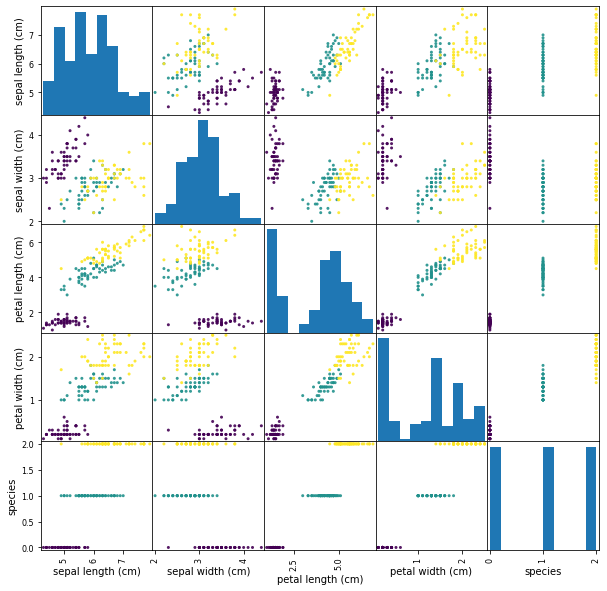

In [ ]:
g = pd.plotting.scatter_matrix(iris, figsize=(10,10), c=iris["species"], alpha = 0.9)
plt.show()

In [ ]:
iris.groupby(by="species").agg(["mean" , "min" , "max", "std"])

sepal length (cm)            ... petal width (cm)               
                     mean  min  max  ...              min  max       std
species                              ...                                
0                   5.006  4.3  5.8  ...              0.1  0.6  0.105386
1                   5.936  4.9  7.0  ...              1.0  1.8  0.197753
2                   6.588  4.9  7.9  ...              1.4  2.5  0.274650

[3 rows x 16 columns]

## Data Preprocessing

The data are in the required form so we continue with splitting the data to features and labels. Then to training and testing data. 

## Classification

#### Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=1000) 
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(clf, iris, handle_iris, remove_all, split_all, "species"), iris, "species", split_all)
clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

Covariance cutoff is: 0.0


0.9666666666666667

#### Naive Bayes Classifier

In [ ]:
nbc_iris = NBC(feature_types=['r', 'r', 'r', 'r'], num_classes=3)
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(nbc_iris, iris, handle_iris, remove_all, split_all, "species"), iris, "species", split_all)
nbc_iris.fit(Xtrain, ytrain)
nbc_iris.score(Xtest, ytest)

Covariance cutoff is: 0.0


0.9666666666666667

In [ ]:
gnb = GaussianNB()
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(gnb, iris, handle_iris, remove_all, split_all, "species"), iris, "species", split_all)
gnb.fit(Xtrain, ytrain)
gnb.score(Xtest, ytest)

Covariance cutoff is: 0.0


0.9666666666666667

### Compare NBC with LR

In [ ]:
X, y = iris.drop("species", axis=1).to_numpy(), iris['species'].to_numpy()

In [ ]:
nbc = NBC(feature_types=['r'] * 4, num_classes=3)
lr = LogisticRegression(penalty='none')
tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, lr, X, y)

Plotting the performance of Logistic Regression and NBC classifiers.

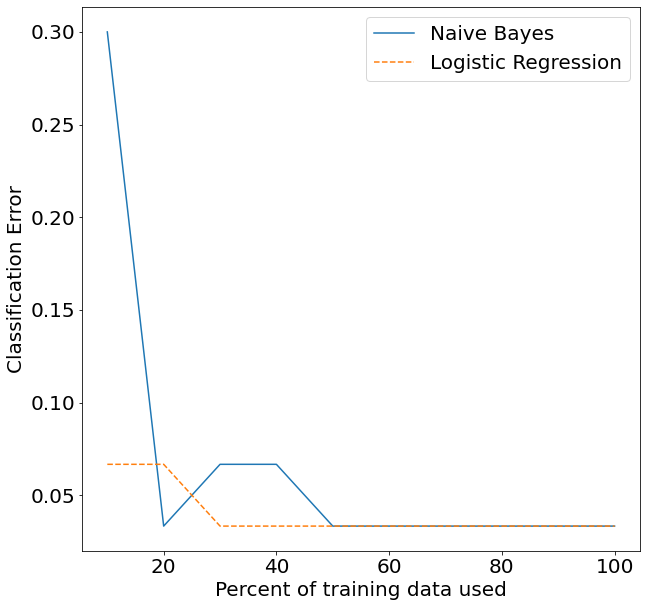

In [ ]:
makePlot(tst_errs_nbc, tst_errs_lr, title=None)

# Dataset 2: Voting Dataset

https://archive.ics.uci.edu/ml/datasets/congressional+voting+records


The dataset consists of 435 instances with 16 features. All the features are binary, with values 'y', 'n' and refer to the votes of each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The output label presents if the voter is republican or democrat.
- Data Cleaning: Since the features are binary there is no feature that needs reforming to produce easier translatable values. In addition, all columns contain adequate amount of both possible values so we decide not to drop a column.
- Data Preprocessing: We observe that the dataset contains multiple missing values noted as NaNs, with the feature "export-administration-act-south-africa" containing the largest amount. We will drop this column as not useful and afterwards drop the rows containing missing values. We will also retain a copy of the dataset before dropping, to be used in the NBC, since it can handle missing values. 
- Classification: We expect the NBC to perform better with fewer data and the Logistic Regression to catch up and perform better with more data. From our graph we can observe that for both classifiers as the amount of training data increases the test error generally decreases.

## Read Dataset

In [ ]:
# TODO: insert your code for experiments
###################################################
##### YOUR CODE STARTS HERE #######################
###################################################
voting = pd.read_csv('./datasets/voting.csv')
#voting = pd.read_csv('/content/drive/MyDrive/Practical 2 - Foundations/datasets/voting.csv')
voting
###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

,label,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [ ]:
voting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   label                                   435 non-null    object
 1   handicapped-infants                     423 non-null    object
 2   water-project-cost-sharing              387 non-null    object
 3   adoption-of-the-budget-resolution       424 non-null    object
 4   physician-fee-freeze                    424 non-null    object
 5   el-salvador-aid                         420 non-null    object
 6   religious-groups-in-schools             424 non-null    object
 7   anti-satellite-test-ban                 421 non-null    object
 8   aid-to-nicaraguan-contras               420 non-null    object
 9   mx-missile                              413 non-null    object
 10  immigration                             428 non-null    object
 11  synfue

In [ ]:
voting.describe()

,label,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


## Exploratory Data Analysis (EDA)

In [ ]:
voting['label'].value_counts()

democrat      267
republican    168
Name: label, dtype: int64

In [ ]:
voting = prep_bin(voting, ['republican', 'democrat', 'n', 'y'])

Since we performed a mapping of the label we can produce the correlation table.

In [ ]:
voting.corr()

,label,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
label,1.000000,0.409330,-0.004534,0.748864,-0.923256,-0.718769,-0.428333,0.521967,0.661876,0.629798,-0.083809,0.378241,-0.714923,-0.555971,-0.625283,0.538263,0.353274
handicapped-infants,0.409330,1.000000,0.024534,0.402872,-0.426936,-0.376854,-0.410618,0.369673,0.406055,0.351498,-0.088075,0.110373,-0.430514,-0.361451,-0.382039,0.212277,0.215274
water-project-cost-sharing,-0.004534,0.024534,1.000000,-0.057479,0.078729,0.143049,0.162395,-0.217742,-0.109993,-0.206498,-0.130578,0.196783,-0.023234,0.241726,-0.014166,-0.120961,-0.082992
adoption-of-the-budget-resolution,0.748864,0.402872,-0.057479,1.000000,-0.734342,-0.664629,-0.434296,0.592229,0.715118,0.624167,0.021484,0.224980,-0.673576,-0.542532,-0.602013,0.496631,0.462383
physician-fee-freeze,-0.923256,-0.426936,0.078729,-0.734342,1.000000,0.768915,0.477723,-0.593601,-0.711241,-0.658947,0.045779,-0.295161,0.721564,0.613326,0.667452,-0.558386,-0.414938
el-salvador-aid,-0.718769,-0.376854,0.143049,-0.664629,0.768915,1.000000,0.634114,-0.710549,-0.847033,-0.815255,0.009547,-0.153352,0.662799,0.673361,0.717392,-0.584788,-0.407177
religious-groups-in-schools,-0.428333,-0.410618,0.162395,-0.434296,0.477723,0.634114,1.000000,-0.548960,-0.558602,-0.592856,0.091666,0.017072,0.523010,0.562159,0.594818,-0.464394,-0.279707
anti-satellite-test-ban,0.521967,0.369673,-0.217742,0.592229,-0.593601,-0.710549,-0.548960,1.000000,0.736963,0.677874,0.033905,0.044115,-0.560396,-0.593248,-0.531396,0.500104,0.489163
aid-to-nicaraguan-contras,0.661876,0.406055,-0.109993,0.715118,-0.711241,-0.847033,-0.558602,0.736963,1.000000,0.766218,0.028329,0.140779,-0.641907,-0.623697,-0.635365,0.555220,0.471856
mx-missile,0.629798,0.351498,-0.206498,0.624167,-0.658947,-0.815255,-0.592856,0.677874,0.766218,1.000000,0.031878,0.047299,-0.618020,-0.552664,-0.580921,0.507571,0.408775


## Data Preprocessing

The feature "export-administration-act-south-africa" is not contributing much to the classification and also includes a lot of missing values. We decide to drop it and indeed the accuracy of both models increases.

In [ ]:
votingNBC=voting.copy()
#By this I drop the column for both logistic and NBC, in the compare it's dropped for both
voting = voting.drop("export-administration-act-south-africa", axis=1)
voting = voting.dropna()   # remains from 435 with 281 rows

In [ ]:
def handle_voting(Xtrain):       
  N, D = Xtrain.shape 
  feat_type = ['b']*D
  return feat_type

## Classification


### Logistic Regression

In [ ]:
clf = LogisticRegression()
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(clf, voting, handle_voting, remove_all, split_all, "label"), voting, "label", split_all)
clf.fit(Xtrain, ytrain)  
clf.score(Xtest, ytest)

Covariance cutoff is: 0.0


1.0

### Naive Bayes Classifier

In [ ]:
nbc_voting = NBC(feature_types=['b']*16, num_classes=2)
X, y = voting.iloc[:,1:].to_numpy(), voting.iloc[:,0].to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
nbc_voting.fit(Xtrain, ytrain) 
nbc_voting.score(Xtest, ytest)

0.9473684210526315

In [ ]:
gnb = GaussianNB()
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(gnb, voting, handle_voting, remove_all, split_all, "label"), voting, "label", split_all)
gnb.fit(Xtrain, ytrain)
gnb.score(Xtest, ytest)

Covariance cutoff is: 0.0


0.9649122807017544

### Compare NBC with LR


In [ ]:
X, y = voting.iloc[:,1:].to_numpy(), voting.iloc[:,0].to_numpy()
nbc = NBC(feature_types=['b']*16, num_classes=2)
lr = LogisticRegression()
tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, lr, X, y)

Plotting the performance of Logistic Regression and NBC classifiers.

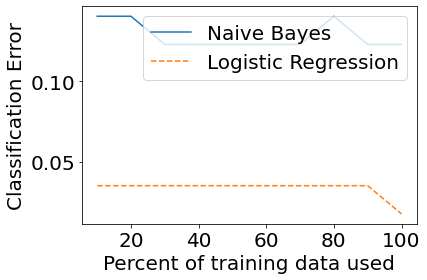

In [ ]:
makePlot(tst_errs_nbc, tst_errs_lr, title=None)

# Dataset 3: Car Evaluation Dataset

https://archive.ics.uci.edu/ml/datasets/car+evaluation

The dataset contains 1728 instances and 6 categorical features that represent the characteristics of a car. Based on this features the label decides if the car is unacceptable, acceptable, good or very good for buying.
- Data Cleaning: The features do not need reforming to be better translated.
- Data Preprocessing: We observe that the dataset contains no missing values. However, the distribution of observations to the output labels is very unbalanced. For that reason we will try 2 methods: 1. Stratified sampling based on the output labels, 2. Multi-class classification by joining the labels 'acceptable', 'good' and 'vgood'. The former method ensures that all labels will be represented in the training dataset, while the latter treats the less represented categories ('good' and 'vgood') as members of the acceptable ('acc') category, which is adequately represented in the output labels of the dataset.
- Classification: Both methods are tested on Logistic Regression and NBC. We observe that Multi-class classification leads to more accurate results than Stratified sampling on both classifiers, as expected. Additionally, the comparison graph of the performance of the classifiers with multi-class classification shows that the NBC produces steadily a lower error rate than Logistic Regression.

## Read Dataset

In [ ]:
# TODO: insert your code for experiments
###################################################
##### YOUR CODE STARTS HERE #######################
###################################################
car = pd.read_csv('./datasets/car.csv')
#car = pd.read_csv('/content/drive/MyDrive/Practical 2 - Foundations/datasets/car.csv')
car_four = car.copy()
car
###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
car.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,med,high,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
car.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

## Exploratory Data Analysis (EDA)

The discrete values of the categorical features and target are:

In [ ]:
for col in car:
    print(col, ":  ", car[col].unique())

buying :   ['vhigh' 'high' 'med' 'low']
maint :   ['vhigh' 'high' 'med' 'low']
doors :   ['2' '3' '4' '5more']
persons :   ['2' '4' 'more']
lug_boot :   ['small' 'med' 'big']
safety :   ['low' 'med' 'high']
acceptability :   ['unacc' 'acc' 'vgood' 'good']


In [ ]:
car['acceptability'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64

We observe that the observations are unevenly distributed to categories: <br>
unacc - 70% <br>
acc - 22% <br>
good - 4% <br>
vgood - 3.8%

This can be visualised by the following barplot.

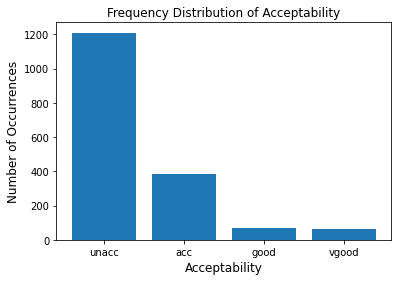

In [ ]:
accept_val = car.acceptability.value_counts()
plt.bar(accept_val.index, accept_val.values)
plt.title('Frequency Distribution of Acceptability')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Acceptability', fontsize=12)
plt.show()

This uneven distribution of categories will lead us to Stratified Sampling so that all target labels exist as evenly as possible in our training dataset.

## Data Preprocessing

The features are ordinal but we make sure their order is correctly depicted on the encoding we make.

In [ ]:
def ord_data(car):
  X, y = car.iloc[:,:-1].to_numpy(), car.iloc[:,-1].to_numpy()

  ordinal = OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'], 
                                      ['low', 'med', 'high', 'vhigh'], 
                                      ['2','3','4','5more'],
                                      ['2','4','more'], 
                                      ['small','med','big'],
                                      ['low','med','high']])
  X = ordinal.fit_transform(X).astype(np.int32)
  le = LabelEncoder()
  y = le.fit_transform(y)
  return X,y

In [ ]:
# 1. Multi-class Classification
car = car.replace('good','acc')
car = car.replace('vgood','acc')
X,y = ord_data(car)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# 2. Stratified Sampling
X_four, y_four = ord_data(car_four)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(X, y):
    Xtrain_four = X_four[train_index]
    Xtest_four = X_four[test_index]
    ytrain_four = y_four[train_index]
    ytest_four = y_four[test_index]

print(np.unique(ytrain_four, return_counts = True))
print(np.unique(ytest_four, return_counts = True))

(array([0, 1, 2, 3]), array([308,  54, 968,  52]))
(array([0, 1, 2, 3]), array([ 76,  15, 242,  13]))


## Classification

### Logistic Regression

In [ ]:
clf = LogisticRegression(solver='lbfgs', penalty='l2').fit(Xtrain, ytrain)  
clf.score(Xtest, ytest)

0.869942196531792

In [ ]:
clf_four = LogisticRegression(solver='lbfgs', penalty='l2').fit(Xtrain_four, ytrain_four)  
clf_four.score(Xtest_four, ytest_four)

0.815028901734104

### Naive Bayes Classifier

In [ ]:
nbc_car = NBC(feature_types=['c']*6, num_classes=2)
nbc_car.fit(Xtrain, ytrain)
nbc_car.score(Xtest, ytest)

0.9450867052023122

In [ ]:
nbc_car_four = NBC(feature_types=['c']*6, num_classes=4)
nbc_car_four.fit(Xtrain_four, ytrain_four)
nbc_car_four.score(Xtest_four, ytest_four)

0.8641618497109826

In [ ]:
gnb = GaussianNB().fit(Xtrain, ytrain)
gnb.score(Xtest, ytest)

0.8959537572254336

In [ ]:
gnb = GaussianNB().fit(Xtrain_four, ytrain_four)
gnb.score(Xtest_four, ytest_four)

0.6936416184971098

### Compare NBC with LR

In [ ]:
X,y = ord_data(car)
nbc = NBC(feature_types=['c']*6, num_classes=2)
lr = LogisticRegression()
tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, lr, X, y)

Plotting the performance of Logistic Regression and NBC classifiers.

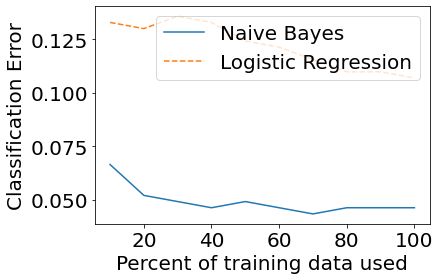

In [ ]:
makePlot(tst_errs_nbc, tst_errs_lr, title=None)

# Dataset 4: Breast Cancer Dataset

https://archive.ics.uci.edu/ml/datasets/breast+cancer

The dataset contains 286 instances and 9 features representing possible factors related to breast cancer. The features include 5 ordinal categorical features, 2 binary and 1 nominal. The labels decide if these factors lead to recurrence events of breast cancer or not.
- Data Cleaning: The features do not need reforming to be better translated.
- Data Preprocessing: 2 features contain (in total) 9 missing values in the form of "?". We drop the rows containing them. For the NBC we only drop the row that was observed in the nominal feature since One-hot encoding presented obstacles when facing NaN. When handling the ordinal categorical features we decide to map them using Ordinal encoder. Furthermore, we transform the nominal feature using One-hot encoder and map the binary feature values to 0 and 1.
- Classification: Via the test error graph we observe that NBC produces more accurate results for all different portions of the training dataset. It is also notable that both classifiers produce a higher error rate for the breast cancer dataset than for the previous datasets, despite it generally decreases as the training dataset becomes larger.

## Read Dataset

In [ ]:
# TODO: insert your code for experiments
###################################################
##### YOUR CODE STARTS HERE #######################
###################################################
cancer = pd.read_csv('./datasets/breast-cancer.csv')
#cancer = pd.read_csv('/content/drive/MyDrive/Practical 2 - Foundations/datasets/breast-cancer.csv')
cancer
###################################################
##### YOUR CODE ENDS HERE #########################
###################################################

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
cancer.describe(include='all')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,286,286,286,286,286,286,286.000000,286,286,286
unique,2,6,3,11,7,3,NaN,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,NaN,left,left_low,no
freq,201,96,150,60,213,222,NaN,152,110,218
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.048951,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.738217,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN


In [ ]:
for col in cancer:
    print(np.unique(cancer[col], return_counts = True))

(array(['no-recurrence-events', 'recurrence-events'], dtype=object), array([201,  85]))
(array(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], dtype=object), array([ 1, 36, 90, 96, 57,  6]))
(array(['ge40', 'lt40', 'premeno'], dtype=object), array([129,   7, 150]))
(array(['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '5-9', '50-54'], dtype=object), array([ 8, 28, 30, 50, 54, 60, 19, 22,  3,  4,  8]))
(array(['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11'],
      dtype=object), array([213,   3,   6,   1,  36,  17,  10]))
(array(['?', 'no', 'yes'], dtype=object), array([  8, 222,  56]))
(array([1, 2, 3]), array([ 71, 130,  85]))
(array(['left', 'right'], dtype=object), array([152, 134]))
(array(['?', 'central', 'left_low', 'left_up', 'right_low', 'right_up'],
      dtype=object), array([  1,  21, 110,  97,  24,  33]))
(array(['no', 'yes'], dtype=object), array([218,  68]))


## Exploratory Data Analysis (EDA)

The discrete values of the features and target are:

In [ ]:
for col in cancer:
    print(col, ":", '\n', cancer[col].dtype, '\t', cancer[col].unique())

Class : 
 object 	 ['no-recurrence-events' 'recurrence-events']
age : 
 object 	 ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause : 
 object 	 ['premeno' 'ge40' 'lt40']
tumor-size : 
 object 	 ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes : 
 object 	 ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps : 
 object 	 ['no' 'yes' '?']
deg-malig : 
 int64 	 [3 2 1]
breast : 
 object 	 ['left' 'right']
breast-quad : 
 object 	 ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
irradiat : 
 object 	 ['no' 'yes']


In [ ]:
cancer['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

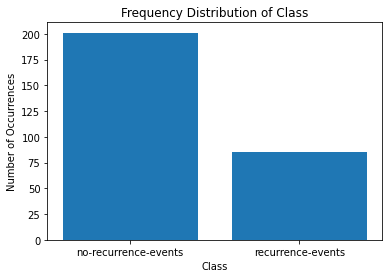

In [ ]:
class_val = cancer.Class.value_counts()
plt.bar(class_val.index, class_val.values)
plt.title('Frequency Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Number of Occurrences')
plt.show()

## Data Preprocessing

The "?" will be handled as missing values.

In [ ]:
print(np.sum(cancer['node-caps']=='?') )
np.sum(cancer['breast-quad']=='?') 

8


1

In [ ]:
cancer = prep_bin(cancer, ['left', 'right', 'no', 'yes'])
cancer = cancer.replace('?', np.nan)
cancerNBC = cancer.copy()
cancer = cancer.dropna()

In [ ]:
cancerNBC = cancerNBC[cancerNBC['breast-quad'].notna()]

Encoding of the categorical features:

In [ ]:
def ord_data(data, model):
    if model == 'log':
        X, y = data.iloc[:,1:].to_numpy(), data.iloc[:,0].to_numpy()
        label = LabelEncoder()
        y = label.fit_transform(y)
    ohe = OneHotEncoder()
    oe = OrdinalEncoder(categories=[['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], 
                                     ['lt40', 'ge40', 'premeno'],
                                     ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'],
                                     ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'],
                                     [1, 2, 3]])
    if model == 'log':
        X[:,[0,1,2,3,5]] = oe.fit_transform(X[:,[0,1,2,3,5]])
        breast_quad_encoded_cols = ohe.fit_transform(X[:,7].reshape(-1, 1))
    else:
        data.iloc[:,[1,2,3,4,6]] = oe.fit_transform(data.iloc[:,[1,2,3,4,6]])
        breast_quad_encoded_cols = ohe.fit_transform(data.iloc[:,8].values.reshape(-1, 1))
    breast_quad = np.array(breast_quad_encoded_cols.todense())
    if model == 'log':
        X = np.hstack((X[:,[0,1,2,3,4,5,6,8]], breast_quad)).astype(np.int32)
    else:
        X = np.hstack((data.iloc[:,[1,2,3,4,5,6,7,9]], breast_quad))
        y = data.iloc[:,0].to_numpy() 
        label = LabelEncoder()
        y = label.fit_transform(y)
    return X,y

## Classification

### Logistic Regression

In [ ]:
X,y = ord_data(cancer, 'log')

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
clf = LogisticRegression(solver='lbfgs', penalty='l2').fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

0.7321428571428571

### Naive Bayes Classifier

In [ ]:
#without missing data
nbc_cancer = NBC(feature_types=['c', 'c', 'c', 'c', 'b', 'c', 'b','b', 'b', 'b', 'b', 'b', 'b'], num_classes=2)
nbc_cancer.fit(Xtrain, ytrain)
print(accuracy(nbc_cancer, Xtrain, ytrain, Xtest, ytest))

0.7321428571428571


In [ ]:
X_NBC,y_NBC = ord_data(cancerNBC, 'nbc')
Xtrain_NBC, Xtest_NBC, ytrain_NBC, ytest_NBC = train_test_split(X_NBC, y_NBC, test_size=0.2, random_state=1)

In [ ]:
#with missing data
nbc_missing = NBC(feature_types=['c', 'c', 'c', 'c', 'b', 'c', 'b','b', 'b', 'b', 'b', 'b', 'b'], num_classes=2)
nbc_missing.fit(Xtrain_NBC, ytrain_NBC)
nbc_missing.score(Xtest_NBC, ytest_NBC)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in subtract


0.6842105263157895

In [ ]:
gnb = GaussianNB()
print(accuracy(gnb, Xtrain, ytrain, Xtest, ytest))

0.75


### Compare NBC with LR

In [ ]:
nbc = NBC(feature_types=['c', 'c', 'c', 'c', 'b', 'c', 'b', 'b', 'b', 'b', 'b', 'b', 'b'], num_classes=2)
lr = LogisticRegression(random_state=0)
tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, lr, X, y)    

Plotting the performance of Logistic Regression and NBC classifiers.

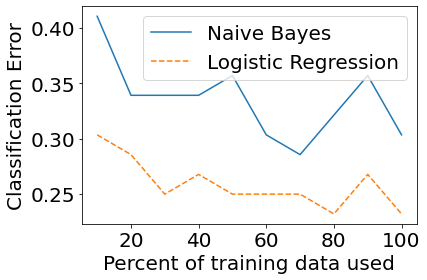

In [ ]:
makePlot(tst_errs_nbc, tst_errs_lr, title=None)

# Dataset 5: Ionosphere Dataset

https://archive.ics.uci.edu/ml/datasets/ionosphere

The dataset consists of 351 instances with 34 attributes, plus the binary class attribute which takes values "good" or "bad" depending on the evidence of some type of structure in the ionosphere. All the attributes are continuous.
- data cleaning: Feature 2 does not convey any info whatsoever, since there is no variance. Because of this, we can drop it. A standard pre-processing step was transforming the "g" and "b" target labels into integer form, respectively, as 1's and 0's.
- A visual histogram representation of the frequencies for each attribute reveals that many histograms are heavy-tailed; additionally, it revealed a patter in the data: odd-numbered features are skewed to the right, while even features are more bell-shaped. Noticing that feature3 is the most correlated feature with the class label and give the attribute's high-skewed distribution, we wanted to ensure that the test dataset was representing it enough. However, after applying a stratified shuffle split to train the models, no accuracy improvement occurred. Therefore, no additional preprocessing step was needed. 
- By color-coding the correlation among attributes, we can safely say that no structural and/or data collinearity is present in the dataset. 
- Feature selection was performed by excluding all the features that are not correlated enough with the label. The threshold is obtained by accounting for the model accuracy at each cutoff point, and then taking the one that gives the highest accuracy.
- We noticed the dataset has a fundamental structure, namely, the first 200 rows have balanced label frequency (101 rows for "g", 99 for "b"). Therefore, the training-testing split was performed by accounting for this important detail. 
- By examining the test error rate graph as we increase the size of the training set, one can see that as we increase the training size, the error generally decreases. The NBC test error is slightly higher than the one obtained from the logistic regression classification.

### Read the dataset

In [ ]:
# create a dataframe from the csv file
ionosphere = pd.read_csv('./datasets/ionosphere.csv')
#ionosphere = pd.read_csv('/content/drive/MyDrive/Practical 2 - Foundations/datasets/ionosphere.csv')

# show the first five rows of the data
ionosphere.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
ionosphere.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

## Data cleaning

In [ ]:
#All the features are continuous, except for "feature1" and "feature2" which need some understanding.
ionosphere["feature1"].value_counts()

# feature 2 does not convey any info whatsoever, since there is no variance. we can drop it.
ionosphere["feature34"].value_counts()

 0.00000    51
 1.00000    25
-1.00000    15
-0.29091     1
-0.03352     1
            ..
 0.01214     1
 0.16645     1
-0.01425     1
 0.07895     1
-0.05402     1
Name: feature34, Length: 263, dtype: int64

In [ ]:
ionosphere.drop(columns=['feature2'], inplace=True)
ionosphere = prep_bin(ionosphere, ['g', 'b'])

In [ ]:
#check the descriptive statistic of the dataset
ionosphere.describe()


,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.358974
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,0.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the features except for binary feature 1 span from 0 to 1. By looking at mean and quantiles, we can see that the data is skewed

## Visualize the data

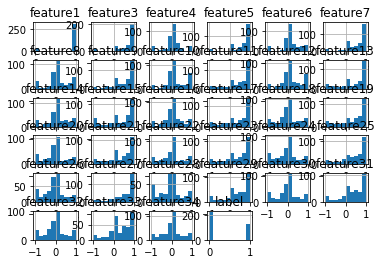

In [ ]:
hist = ionosphere.hist()

- This reveals that many histograms are heavy-tailed. We can transform the affected columns in a logarithmic scale, so to have a more bell-shaped distribution.
- Also, we can see there's a patter in the data: odd-numbered features are skewed to the right, while even features are more bell-shaped. We investigate this further

In [ ]:
# Plot correlation matrix
def plot_corr_matrix(df):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation=None)
    fig.colorbar(cax)
    plt.show()

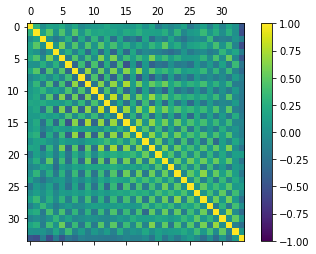

In [ ]:
plot_corr_matrix(ionosphere)

In [ ]:
# The 4 highest correlated variables to the label are:
ionosphere.corr().label.sort_values(ascending=False)[1:]

feature22    0.116385
feature27    0.111107
feature34    0.064168
feature32    0.036004
feature30    0.003942
feature26   -0.001541
feature24   -0.006193
feature20   -0.035620
feature28   -0.042756
feature17   -0.087060
feature19   -0.117435
feature18   -0.119346
feature10   -0.120634
feature4    -0.125884
feature16   -0.148775
feature6    -0.149099
feature12   -0.159940
feature11   -0.167908
feature13   -0.181682
feature25   -0.188185
feature14   -0.197041
feature23   -0.204361
feature15   -0.207201
feature8    -0.207544
feature21   -0.219583
feature29   -0.250036
feature33   -0.261157
feature31   -0.294417
feature9    -0.294852
feature7    -0.450429
feature1    -0.465614
feature5    -0.516477
feature3    -0.519145
Name: label, dtype: float64

In [ ]:
# we notice the dataset has a fundamental structure, where the first 200 rows are balanced in the label frequency (101 rows for "g",99 for "b")
ionosphere.iloc[:200,:]['label'].value_counts()

0    101
1     99
Name: label, dtype: int64

By splitting in training and test set, we exploit this fundamental characteristic.



## Classification

In [ ]:
#Feature selection using wrapper methods
def split_ionosphere(data, l, lc):
  X, y = ionosphere.drop(["label"], axis=1).drop(lc, axis = 1).to_numpy(), ionosphere['label'].to_numpy()
  Xtrain, Xtest = X[:200,:], X[200:,:]
  ytrain, ytest = y[:200], y[200:]
  return Xtrain, Xtest, ytrain, ytest 

def handle_ionosphere(Xtrain):       
  N, D = Xtrain.shape 
  feat_type = ['r']*(D-1)
  feat_type = np.insert(feat_type, 0, 'c')
  return feat_type

### Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=1000) 
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(clf, ionosphere, handle_ionosphere, remove_all,split_ionosphere, "label"), ionosphere, "label",split_ionosphere)
clf.fit(Xtrain, ytrain)
clf, iris, handle_iris, remove_all, split_all, "species"
clf.score(Xtest, ytest)

Covariance cutoff is: 0.01020408163265306


0.9139072847682119

### Naive Bayes

In [ ]:
feat_type = ['r']*33
feat_type = np.insert(feat_type, 0, 'c')
nbc_ionosphere = NBC(feature_types=feat_type, num_classes=2)
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(nbc_ionosphere, ionosphere, handle_ionosphere, remove_all,split_ionosphere, "label"), ionosphere, "label",split_ionosphere)
nbc_ionosphere.fit(Xtrain, ytrain)
nbc_ionosphere.score(Xtest, ytest)

Covariance cutoff is: 0.4591836734693877


0.9072847682119205

In [ ]:
gnb = GaussianNB()
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(gnb, ionosphere, handle_ionosphere, remove_all,split_ionosphere, "label"), ionosphere, "label",split_ionosphere)
gnb.fit(Xtrain, ytrain)
gnb.score(Xtest, ytest)

Covariance cutoff is: 0.29591836734693877


0.9735099337748344

### Compare NBC with LR

In [ ]:
X, y = ionosphere.iloc[:,:-1].to_numpy(), ionosphere.iloc[:,-1].to_numpy()
clf = LogisticRegression(random_state=0)
feat_type = ['r']*33
feat_type = np.insert(feat_type, 0, 'c')
nbc = NBC(feature_types=feat_type, num_classes=2)
tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, clf, X, y)

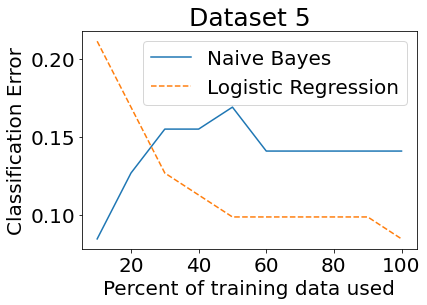

In [ ]:
makePlot(tst_errs_nbc, tst_errs_lr, title="Dataset 5")

# Dataset 6: Sonar Dataset

http://archive.ics.uci.edu/ml/datasets/connectionist+bench+%28sonar,+mines+vs.+rocks%29

The dataset consists of 208 entries with 34 attributes, plus the binary class attribute which represents a classification of sonar signals. All the attributes are continuous. An initial inspection of the dataset shows that the binary output class "label" is balanced, with 111 0's and 97 1's.
- data cleaning: since the input consists of continuous features, we performed an inital normalization step of the whole dataset. Normalization makes training less sensitive to the scale of features, it improve analysis from multiple models and will ensure that a convergence problem does not have a massive variance.
- A visual histogram representation of the frequencies for each attribute shows that some features have gaussian distribution and some others follow an exponential distribution. After applying a stratified shuffle split to train the models, no accuracy improvement occurred. Therefore, no additional preprocessing step was needed. 
- An inspection of the color-coded correlation matrix reveals that there is some structure in the order of the attributes. The high correlation around the diagonal suggests that attributes that are next to each other are generally more correlated among each other. The further attributes are away from each other in the ordering, the higher the magnitude of negative correlation. This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp. 
- The comparison graph shows that both models achieve better scores as the training size increases. Logistic regression performs generally better for this classification task. However, it's worth noticing that the classification error obtained from both models is significantly higher compared to the one obtained from the other datasets. 

## Read the dataset

In [ ]:
# create a dataframe from the csv file
sonar = pd.read_csv('./datasets/sonar.csv')
#sonar = pd.read_csv('/content/drive/MyDrive/Practical 2 - Foundations/datasets/sonar.csv')

# show the first five rows of the data
sonar.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [ ]:
# no null values, all continuous features
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   208 non-null    float64
 1   feature2   208 non-null    float64
 2   feature3   208 non-null    float64
 3   feature4   208 non-null    float64
 4   feature5   208 non-null    float64
 5   feature6   208 non-null    float64
 6   feature7   208 non-null    float64
 7   feature8   208 non-null    float64
 8   feature9   208 non-null    float64
 9   feature10  208 non-null    float64
 10  feature11  208 non-null    float64
 11  feature12  208 non-null    float64
 12  feature13  208 non-null    float64
 13  feature14  208 non-null    float64
 14  feature15  208 non-null    float64
 15  feature16  208 non-null    float64
 16  feature17  208 non-null    float64
 17  feature18  208 non-null    float64
 18  feature19  208 non-null    float64
 19  feature20  208 non-null    float64
 20  feature21 

In [ ]:
# Check if there's unbalance in the dataset
sonar.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,label
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.00

In [ ]:
# balanced output of rocks and mine (metal cylinder)
sonar.groupby("label").size()

label
0    111
1     97
dtype: int64

## Data Cleaning

In [ ]:
mms = preprocessing.MinMaxScaler()
x_scaled = mms.fit_transform(sonar.values)
sonar_scaled = pd.DataFrame(x_scaled)
sonar_scaled.columns = sonar.columns
sonar_scaled.label = sonar_scaled.label.astype(int)

## Data visualization

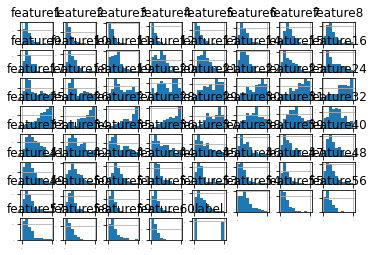

In [ ]:
hist = sonar_scaled.hist(sharex=False,sharey=False, xlabelsize=1, ylabelsize=1)

It can be observed that some features have gaussian distribution and some have exponential distribution.

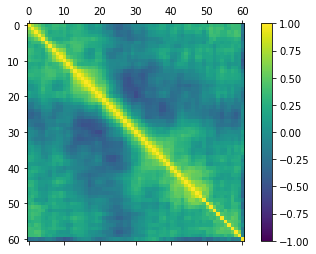

In [ ]:
plot_corr_matrix(sonar_scaled)

In [ ]:
# The 4 highest correlated variables to the label are:
sonar_scaled.corr().iloc[60].sort_values(ascending=False)[1:5]

feature36    0.269151
feature35    0.227670
feature37    0.209055
feature34    0.172010
Name: label, dtype: float64

Univariate correlation doesn't give much hint on which feature is the most relevant to predict the label.

## Classification

In [ ]:
#Feature selection using wrapper methods
def handle_sonar(Xtrain):       
  N, D = Xtrain.shape 
  feat_type = ['r']*(D)
  return feat_type

### Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=1000) 
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(clf, sonar_scaled, handle_sonar, remove_all,split_all, "label"), sonar_scaled, "label",split_all)
clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

Covariance cutoff is: 0.21428571428571427


0.7857142857142857

### Naive Bayes

In [ ]:
nbc_sonar = NBC(feature_types=['r']*60, num_classes=2)
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(nbc_sonar, sonar_scaled, handle_sonar, remove_all,split_all, "label"), sonar_scaled, "label",split_all)
nbc_sonar.fit(Xtrain, ytrain)
nbc_sonar.score(Xtest, ytest)

Covariance cutoff is: 0.3469387755102041


0.7857142857142857

In [ ]:
gnb = GaussianNB()
Xtrain, ytrain, Xtest, ytest = remove_all(cutoff(gnb, sonar_scaled, handle_sonar, remove_all,split_all, "label"), sonar_scaled, "label",split_all)
gnb.fit(Xtrain, ytrain)
gnb.score(Xtest, ytest)

Covariance cutoff is: 0.3469387755102041


0.7857142857142857

### Compare NBC with LR

In [ ]:
X, y = sonar_scaled.iloc[:,:-1].to_numpy(), sonar_scaled.iloc[:,-1].to_numpy()
nbc = NBC(feature_types=['r']*60, num_classes=2)
clf = LogisticRegression(random_state=0)
tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, clf, X, y)

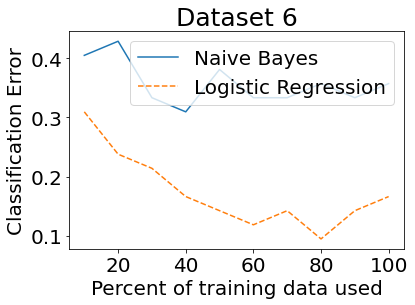

In [ ]:
makePlot(tst_errs_nbc, tst_errs_lr, title = "Dataset 6")